## Import food data
- id: a total of 39774 unique recipes worldwide
- ingredients: ingredients for a recipe 
- cuisine: region of food

In [1]:
import pandas as pd
df=pd.read_csv('/Users/Downloads/food_data.csv')


In [2]:
df.shape

(39774, 3)

In [3]:
print(list(df))
print(df['cuisine'].unique())

['id', 'ingredients', 'cuisine']
['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'italian'
 'mexican' 'chinese' 'british' 'thai' 'vietnamese' 'cajun_creole'
 'brazilian' 'french' 'japanese' 'irish' 'korean' 'moroccan' 'russian']


## Feature Engineering 
- Tokenazation, get 3139 words 
- No Stemming 
- TF-IDF encoding

In [4]:
df['features'] = df['cuisine']+ ' '+ df['ingredients']
print(df['features'].head(5))

0    greek romaine lettuce,black olives,grape tomat...
1    southern_us plain flour,ground pepper,salt,tom...
2    filipino eggs,pepper,salt,mayonaise,cooking oi...
3                indian water,vegetable oil,wheat,salt
4    indian black pepper,shallots,cornflour,cayenne...
Name: features, dtype: object


In [5]:
temp=df['features'].tolist()

In [6]:
bagofwords=[' '.join(item.split(',')) for item in temp]

In [7]:
#print(temp[0])
for (ind,i) in enumerate(temp):
    if ind<1000:
        print(ind, i)
    else:
        break


0 greek romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles
1 southern_us plain flour,ground pepper,salt,tomatoes,ground black pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,vegetable oil
2 filipino eggs,pepper,salt,mayonaise,cooking oil,green chilies,grilled chicken breasts,garlic powder,yellow onion,soy sauce,butter,chicken livers
3 indian water,vegetable oil,wheat,salt
4 indian black pepper,shallots,cornflour,cayenne pepper,onions,garlic paste,milk,butter,salt,lemon juice,water,chili powder,passata,oil,ground cumin,boneless chicken skinless thigh,garam masala,double cream,natural yogurt,bay leaf
5 jamaican plain flour,sugar,butter,eggs,fresh ginger root,salt,ground cinnamon,milk,vanilla extract,ground ginger,powdered sugar,baking powder
6 spanish olive oil,salt,medium shrimp,pepper,garlic,chopped cilantro,jalapeno chilies,flat leaf parsley,skirt steak,white vinegar,sea salt,bay leaf,chorizo sausage
7 italian su

In [8]:
temp[383]

'italian black pepper,olive oil,fat-free cottage cheese,dried oregano,dried basil,grated parmesan cheese,salt,water,part-skim mozzarella cheese,crushed red pepper,fresh basil,cherry tomatoes,cooking spray,oven-ready lasagna noodles'

In [9]:
print(df.iloc[383])

id                                                          1182
ingredients    black pepper,olive oil,fat-free cottage cheese...
cuisine                                                  italian
features       italian black pepper,olive oil,fat-free cottag...
Name: 383, dtype: object


## Check on the encoding results
- check on the 1st food recipe: 
 - greek romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles
- print out the words with highest score: 
 - crumbles garbanzo grape romaine feta olives greek
- seems reasonable to recognize the food

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus =bagofwords
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\S\S+")
X = vectorizer.fit_transform(corpus)
names= vectorizer.get_feature_names()

In [11]:
print(temp[0])
print(names[768], names[1135], names[1220], names[2397], names[1002], names[1953], names[1240])

greek romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles
crumbles garbanzo grape romaine feta olives greek


In [12]:
print(X)

  (0, 768)	0.3238985373668313
  (0, 544)	0.1411422287901164
  (0, 1002)	0.2945583066396238
  (0, 189)	0.20101989513125246
  (0, 1135)	0.376419249631152
  (0, 2506)	0.22290659508296354
  (0, 1957)	0.15941973213113209
  (0, 2274)	0.23167761576438894
  (0, 2088)	0.09890179509420395
  (0, 1141)	0.10202782810877674
  (0, 2893)	0.1471019453817422
  (0, 1220)	0.3393912627020123
  (0, 1953)	0.25287267112759393
  (0, 255)	0.13626743034991862
  (0, 1595)	0.2580829063515231
  (0, 2397)	0.33198499749145455
  (0, 1240)	0.24733815805244508
  (1, 1943)	0.11260937643854639
  (1, 3000)	0.20547400543378297
  (1, 1785)	0.20481161967243636
  (1, 1742)	0.38833088586832054
  (1, 703)	0.21287763837724547
  (1, 3111)	0.26777308894328594
  (1, 1243)	0.18297955960169038
  (1, 938)	0.19420342973696222
  :	:
  (39772, 2452)	0.051297990140355285
  (39772, 1058)	0.0868136064924231
  (39772, 1141)	0.06012790360688233
  (39773, 511)	0.25261345352215203
  (39773, 2395)	0.3940635086251897
  (39773, 209)	0.2175918017440

In [13]:
food_matrix = pd.DataFrame(X.toarray(),columns= vectorizer.get_feature_names())

## Pre-processing!

In [14]:
pd.set_option("display.precision", 2)
food_matrix

,'n,(10,(14,(14.5,(15,(flour),(not,(powder),00,1%,...,za'atar,zatarains,zatarain’s,zero,zest,zesty,zinfandel,ziti,zucchini,épices
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
39770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.34,0.0,0.0,0.0,0.0
39771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
39772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [15]:
preprocessed_data=pd.concat([df['id'], food_matrix], axis=1)
#preprocessed_data['id']=df['id']

## Check the same word "garbanzo" has different values in different recipes.

In [17]:
preprocessed_data['garbanzo'].unique()

array([0.37641925, 0.        , 0.30515239, 0.44950245, 0.46531861,
       0.32785898, 0.32170377, 0.33347913, 0.4963227 , 0.37363339,
       0.29879682, 0.27138409, 0.33450919, 0.28362976, 0.30305152,
       0.41778183, 0.31189847, 0.26963276, 0.28864161, 0.3572315 ,
       0.34502305, 0.394932  , 0.43941545, 0.29088282, 0.27742644,
       0.33869593, 0.52024126, 0.26150297, 0.20682157, 0.35858605,
       0.30302375, 0.34817724, 0.33321307, 0.41944257, 0.23568831,
       0.27607616, 0.30756703, 0.27665065, 0.18397422, 0.34166511,
       0.25631187, 0.32258463, 0.20561373, 0.29070086, 0.45768218,
       0.32307776, 0.48258653, 0.36673477, 0.25124586, 0.29990349,
       0.27130355, 0.28014314, 0.33318963, 0.32666197, 0.39233958,
       0.38092039, 0.36537355, 0.3064436 , 0.30537192, 0.2492773 ,
       0.23341651, 0.40403955, 0.15300592, 0.23557303, 0.28618061,
       0.29224181, 0.29340524, 0.28628195, 0.2488382 , 0.44895691,
       0.34646419, 0.45451568, 0.22983004, 0.23820816, 0.27253

In [18]:
for indx, i in enumerate(list(preprocessed_data)):
    if i=='id':
        print('yes', indx, i)

yes 0 id


In [19]:
#preprocessed_data.shape
#(39774, 3139)

preprocessed_data.head(5)
#preprocessed_data.to_csv('preprocessed_data.csv', index=False)

,id,'n,(10,(14,(14.5,(15,(flour),(not,(powder),00,...,za'atar,zatarains,zatarain’s,zero,zest,zesty,zinfandel,ziti,zucchini,épices
0,10259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#pd.DataFrame(names).to_csv('features_word.txt', header=None, index=False)

# Dimension Reduction

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(4)
data_pca = pca.fit_transform(food_matrix)
# pca_vector=pca.components_
# pca_vector

In [22]:
#df['cuisine'].shape
print(data_pca.shape)
print(data_pca)

(39774, 4)
[[-0.08640219 -0.12696815  0.04012799  0.0790679 ]
 [ 0.00769648 -0.07123703  0.12307499 -0.10858309]
 [-0.01942224  0.11204013  0.04005177  0.08517253]
 ...
 [ 0.19547318 -0.01367935  0.03947658 -0.08034725]
 [ 0.07559634  0.31721403 -0.12348711  0.08501911]
 [-0.26461194 -0.03010583  0.22150055 -0.03801375]]


# Visualization
 - PCA(4) would be better than PCA(2) in terms of searching for similarity 
 - PCA(4) would be less clear than PCA(2) when plotting KMeans into a 2D graph. 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


kmeans_data= data_pca

model = KMeans(n_clusters = 8, init = "k-means++")
centers = np.array(model.fit(kmeans_data).cluster_centers_)
label = model.fit_predict(kmeans_data)
annotate = df['cuisine']


In [24]:
output=pd.DataFrame()
output['label']=label
output['annotte']=annotate

print(output.shape)
#output.to_csv('output_food.csv', index=False)


(39774, 2)


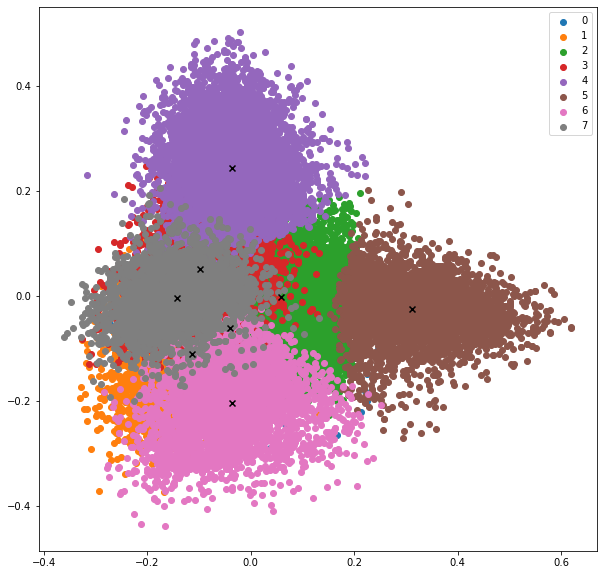

In [26]:
plt.figure(figsize=(10,10))
uniq = np.unique(label)

for i in uniq:
    plt.scatter(kmeans_data[label == i , 0] , kmeans_data[label == i , 1] , label = i)
    
    
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [27]:
food_matrix.shape
#39774, 3139

(39774, 3139)

# Query search
- Search the 383rd food recipe
 - Original recipe: italian black pepper,olive oil,fat-free cottage cheese,dried oregano,dried basil,grated parmesan cheese,salt,water,part-skim mozzarella cheese,crushed red pepper,fresh basil,cherry tomatoes,cooking spray,oven-ready lasagna noodles'
- Rank the key words of the 383rd food recipe
 - oven-ready,cheese,basil,fat-free,dried,cottage,lasagna,part-skim,cherry,noodles,mozzarella,crushed,spray,cooking,oregano,parmesan,grated,pepper,italian,red,tomatoes,water,black,olive,fresh,oil,salt
- Find the most similar recipe based on the 383rd food recipe
 - the 33403rd one receipt: italian tomato paste,crushed tomatoes,lasagna noodles,garlic,fresh parsley,water,minced onion,basil dried leaves,sauce,eggs,parmesan cheese,lean ground beef,salt,white sugar,mozzarella cheese,ground black pepper,ricotta cheese,sweet italian sausage,italian seasoning
 - Ranked key words: italian,cheese,lasagna,lean,ricotta,sausage,noodles,mozzarella,sweet,ground,crushed,minced,seasoning,tomato,paste,beef,parmesan,basil,parsley,dried,leaves,white,eggs,onion,tomatoes,water,black,sauce,sugar,fresh,garlic,pepper,salt

In [28]:
import math

c = X.tocoo()
test = pd.DataFrame({'node1': c.row, 'node2': c.col, 'edge_weight': c.data})                                   

def key_words_search(item):
    list_i= test[test['node1']==item]
    keys=''
    key_ind=list_i.sort_values('edge_weight', ascending=False)['node2'].to_list()
    for key in key_ind: 
        keys=keys+','+names[key]
    return keys
    

def search_query(item_i):
    query= data_pca[item_i]
    rows=data_pca.shape[0]
    min = math.inf
    for item_j in range(rows): 
        list_j=data_pca[item_j]
        result = (np.linalg.norm(query-list_j))
        if abs(result)< min and item_i!=item_j: 
            min = abs(result)
            pop_j=item_j
    keys_item_i=key_words_search(item_i)
    keys_item_j=key_words_search(pop_j)
    print(item_i, keys_item_i)
    print(pop_j, keys_item_j)
    
search_query(383)

    

383 ,oven-ready,cheese,basil,fat-free,dried,cottage,lasagna,part-skim,cherry,noodles,mozzarella,crushed,spray,cooking,oregano,parmesan,grated,pepper,italian,red,tomatoes,water,black,olive,fresh,oil,salt
33403 ,italian,cheese,lasagna,lean,ricotta,sausage,noodles,mozzarella,sweet,ground,crushed,minced,seasoning,tomato,paste,beef,parmesan,basil,parsley,dried,leaves,white,eggs,onion,tomatoes,water,black,sauce,sugar,fresh,garlic,pepper,salt


In [29]:
print(temp[33403])

italian tomato paste,crushed tomatoes,lasagna noodles,garlic,fresh parsley,water,minced onion,basil dried leaves,sauce,eggs,parmesan cheese,lean ground beef,salt,white sugar,mozzarella cheese,ground black pepper,ricotta cheese,sweet italian sausage,italian seasoning


In [30]:
temp[383]

'italian black pepper,olive oil,fat-free cottage cheese,dried oregano,dried basil,grated parmesan cheese,salt,water,part-skim mozzarella cheese,crushed red pepper,fresh basil,cherry tomatoes,cooking spray,oven-ready lasagna noodles'

# Check on google.com by inputting the keywords and see if the recommended food looks similar to the queried food.

 - Queried recipe showned in google
  - https://www.createkidsclub.com/no-boil-lasagna/
 - Recommended similar recipe showned in google
  - https://www.allrecipes.com/recipe/23600/worlds-best-lasagna/
 

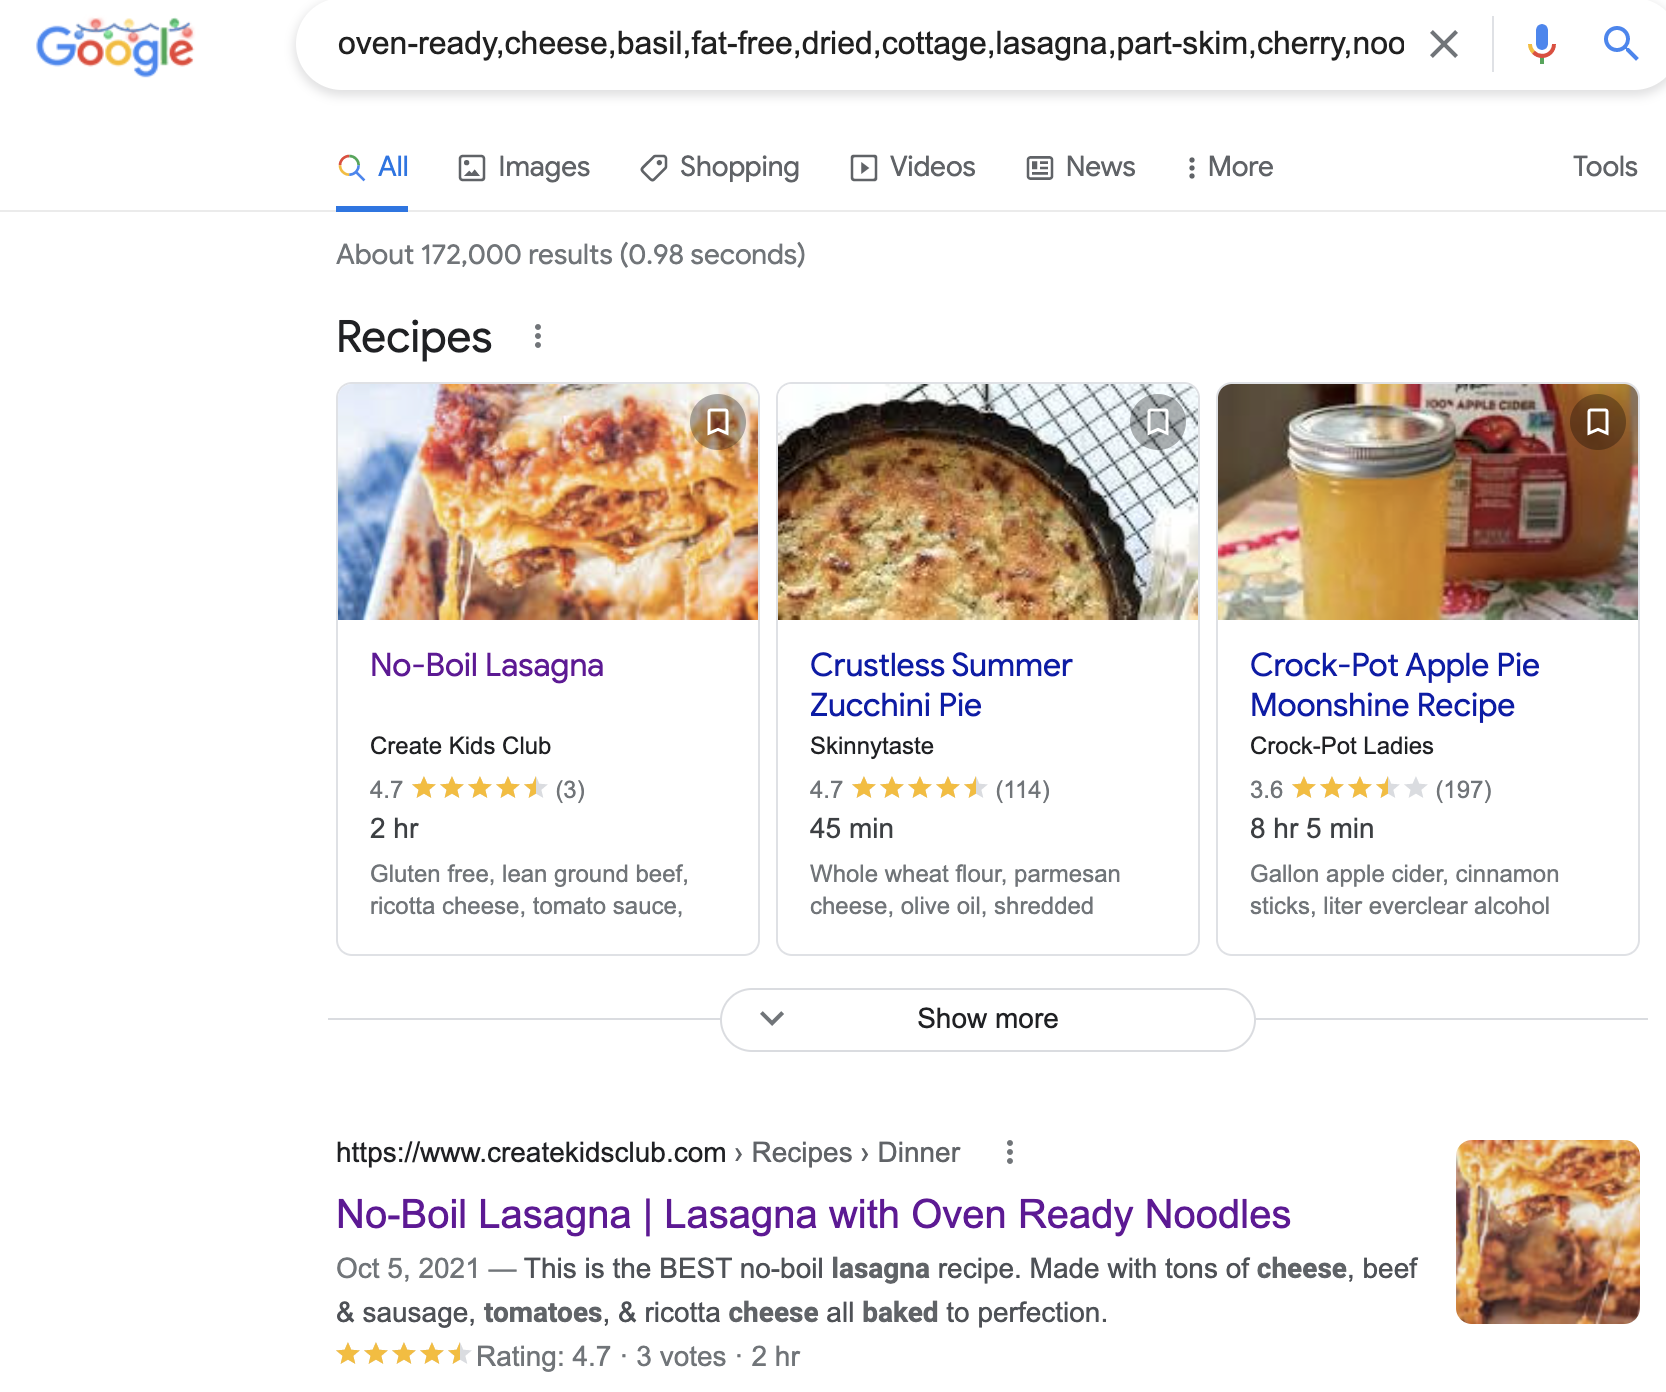

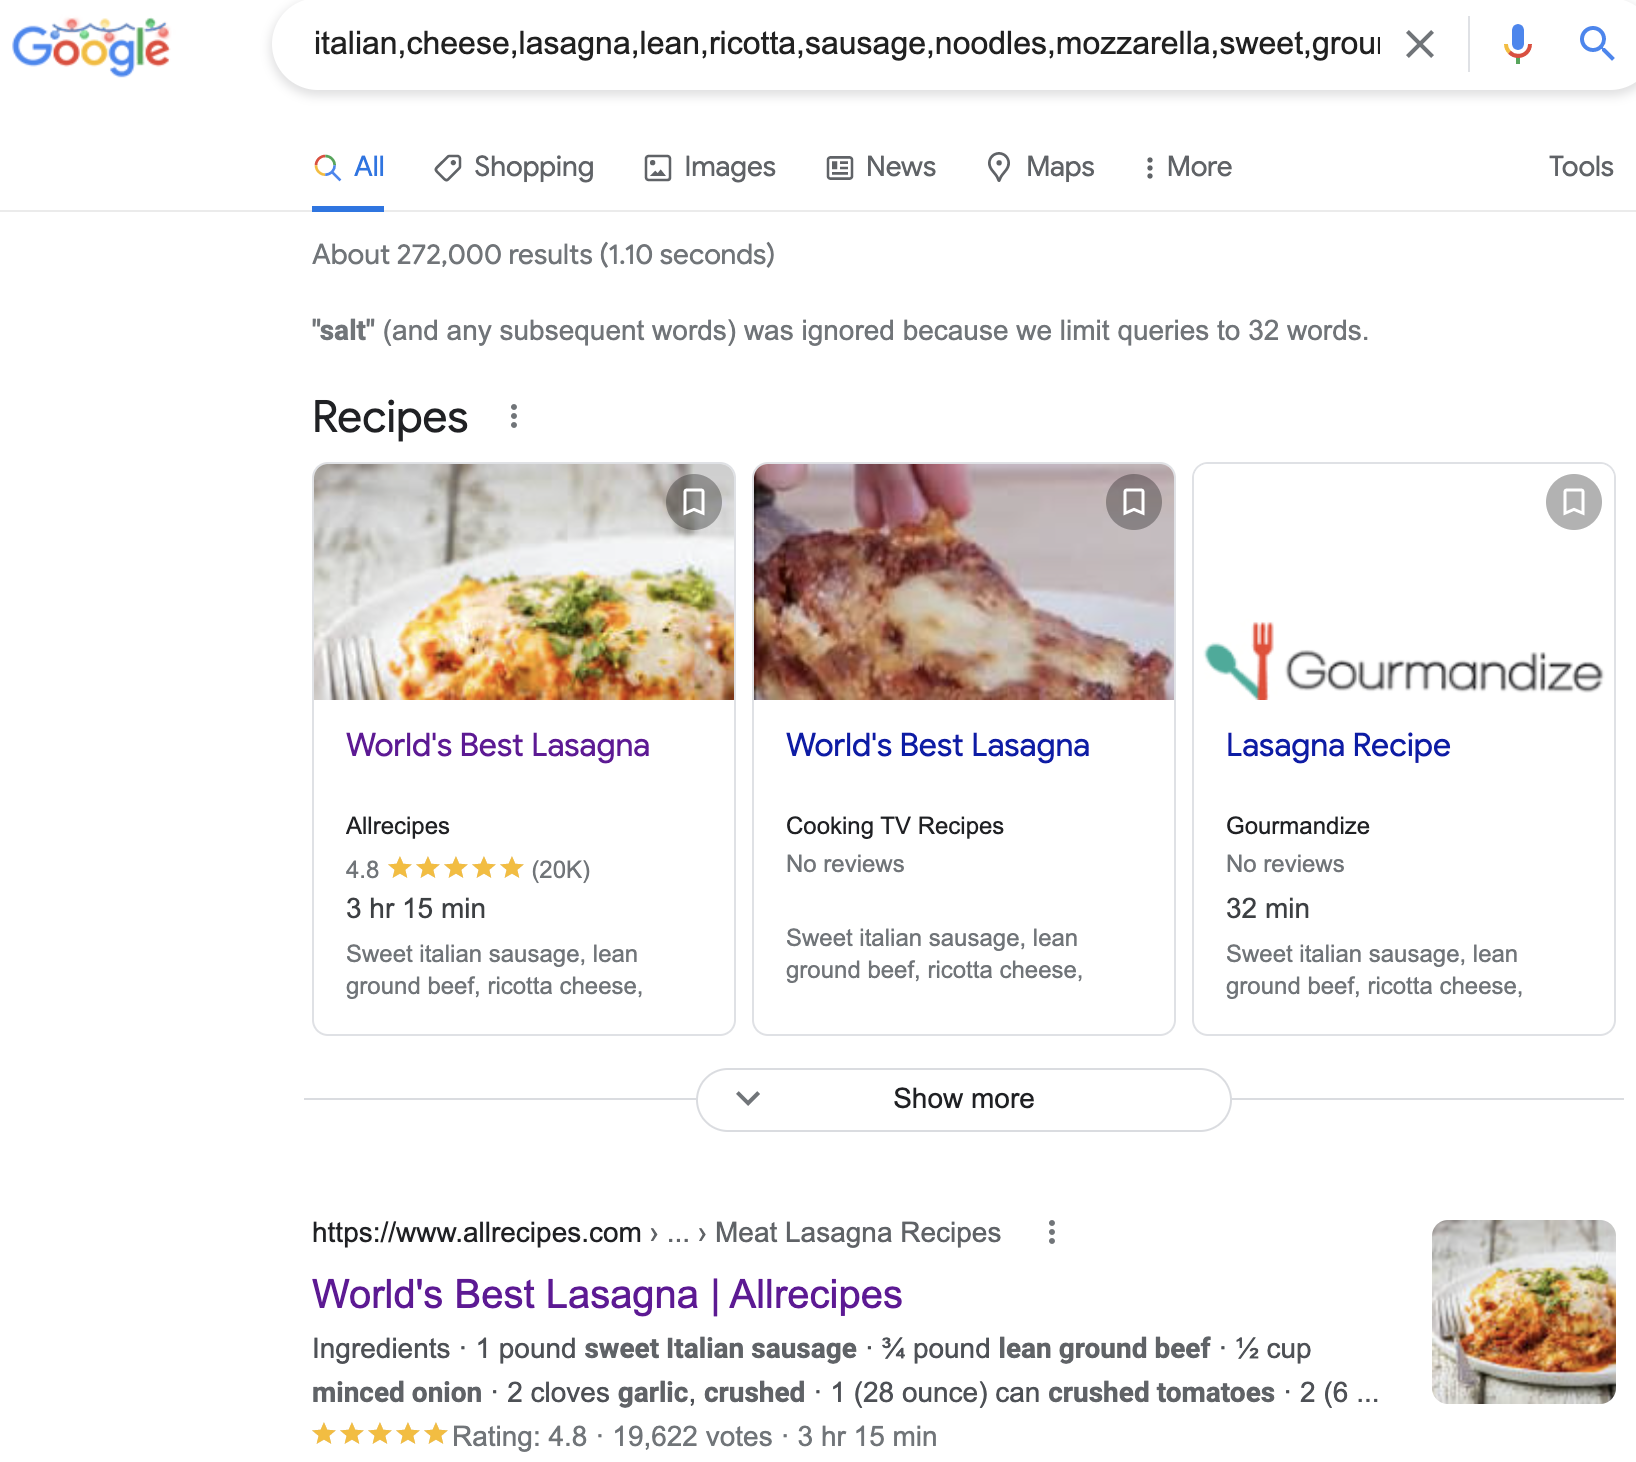